In [1]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [2]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Potato/Potato_final_drop.xlsx")

In [3]:
df.head(10)

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice,Date
0,815.0,2450.0,22231.0,1758.0,2770.0,32806.0,776.0,1131.0,7020.0,607.0,1215.0,34213.0,1900.0,2544.0,11910.0,786.0,1271.0,5305.0,841.0,1142.0,9288.0,1245.0,2000.0,31379.0,1394.0,1902.0,16924.0,802.0,1255.0,5655.0,53.74,2015-01-01
1,576.0,2000.0,17116.0,1569.0,2592.0,21241.0,583.0,853.0,9880.0,525.0,1035.0,31006.0,1382.0,1935.0,4426.0,718.0,1162.0,4294.0,583.0,818.0,14427.0,1084.0,1855.0,32856.0,1258.0,1755.0,7364.0,699.0,1208.0,6115.0,51.96,2015-02-01
2,348.0,1550.0,22966.0,1246.0,2274.0,22587.0,509.0,731.0,9425.0,523.0,992.0,31200.0,1120.0,1680.0,5052.0,657.0,1077.0,14936.0,463.0,754.0,13086.0,1019.0,1982.0,31267.0,1020.0,1465.0,6916.0,440.0,933.0,6340.0,55.41,2015-03-01
3,318.0,1473.0,7729.0,1153.0,2105.0,22022.0,556.0,770.0,8875.0,430.0,804.0,26756.0,1071.0,1588.0,6342.0,492.0,867.0,21141.0,569.0,812.0,11835.0,716.0,1052.0,30272.0,802.0,1160.0,8707.0,429.0,817.0,6180.0,52.56,2015-04-01
4,381.0,1463.0,8255.0,1004.0,2050.0,23161.0,650.0,885.0,10550.0,450.0,1032.0,27740.0,1410.0,2081.0,7208.0,481.0,813.0,15074.0,627.0,908.0,6183.0,769.0,1313.0,27165.0,1056.0,1537.0,11301.0,437.0,835.0,6395.0,58.19,2015-05-01
5,513.0,1500.0,5256.0,1048.0,2091.0,22649.0,706.0,953.0,7080.0,1097.0,1724.0,21052.0,1358.0,1992.0,5998.0,522.0,805.0,14319.0,NaN,NaN,NaN,853.0,1217.0,22746.0,1117.0,1677.0,10688.0,599.0,975.0,4040.0,56.69,2015-06-01
6,419.0,1500.0,9134.0,929.0,2000.0,21285.0,NaN,NaN,NaN,1703.0,2308.0,31004.0,1018.0,1727.0,6072.0,NaN,NaN,NaN,NaN,NaN,NaN,860.0,1512.0,32072.0,1008.0,1459.0,12873.0,NaN,NaN,NaN,53.37,2015-07-01
7,434.0,1895.0,10844.0,863.0,2000.0,27800.0,NaN,NaN,NaN,1707.0,2171.0,27543.0,916.0,1453.0,9218.0,NaN,NaN,NaN,NaN,NaN,NaN,787.0,1412.0,40846.0,862.0,1240.0,10121.0,650.0,1000.0,237.0,48.23,2015-08-01
8,482.0,2000.0,9793.0,786.0,2000.0,23551.0,NaN,NaN,NaN,1554.0,2035.0,27512.0,947.0,1520.0,6894.0,NaN,NaN,NaN,NaN,NaN,NaN,889.0,1295.0,39600.0,891.0,1303.0,10111.0,NaN,NaN,NaN,47.70,2015-09-01
9,601.0,2000.0,9578.0,805.0,2027.0,28165.0,NaN,NaN,NaN,1812.0,2305.0,29552.0,1000.0,1536.0,7330.0,NaN,NaN,NaN,NaN,NaN,NaN,1027.0,1643.0,34370.0,1018.0,1368.0,7150.0,1831.0,2444.0,384.0,49.26,2015-10-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AHMEDABAD_WholesalePrice     26 non-null     float64       
 1   AHMEDABAD_RetailPrice        26 non-null     float64       
 2   AHMEDABAD_Volume             26 non-null     float64       
 3   Bengaluru_WholesalePrice     65 non-null     float64       
 4   Bengaluru_RetailPrice        65 non-null     float64       
 5   Bengaluru_Volume             65 non-null     float64       
 6   BHUBANESHWAR_WholesalePrice  29 non-null     float64       
 7   BHUBANESHWAR_RetailPrice     29 non-null     float64       
 8   BHUBANESHWAR_Volume          29 non-null     float64       
 9   DELHI_WholesalePrice         63 non-null     float64       
 10  DELHI_RetailPrice            63 non-null     float64       
 11  DELHI_Volume                 63 non-null     fl

In [5]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 67
Columns  : 32

 Features 
 ['AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'BHUBANESHWAR_WholesalePrice', 'BHUBANESHWAR_RetailPrice', 'BHUBANESHWAR_Volume', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'RANCHI_WholesalePrice', 'RANCHI_RetailPrice', 'RANCHI_Volume', 'DieselPrice', 'Date']

 Missing Values 
 AHMEDABAD_WholesalePrice        True
AHMEDABAD_RetailPrice           True
AHMEDABAD_Volume                True
Bengaluru_WholesalePrice        True
Bengaluru_RetailPrice           True
Bengaluru_Volume                True
BHUBANESHWAR_Wh

In [6]:
df.describe()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice
count,26.000000,26.000000,26.000000,65.000000,65.000000,65.000000,29.000000,29.000000,29.000000,63.000000,63.000000,63.000000,41.000000,41.000000,41.000000,45.000000,45.000000,45.000000,33.000000,33.000000,33.000000,64.000000,64.000000,64.000000,65.000000,65.000000,65.000000,46.000000,46.000000,46.000000,67.000000
mean,585.730769,1744.653846,12393.153846,1328.061538,2509.276923,23548.600000,835.965517,1185.068966,6228.793103,1091.873016,1997.396825,29394.111111,1314.121951,2460.365854,6529.219512,766.622222,1433.111111,10661.311111,937.545455,1332.272727,5861.787879,1206.593750,1928.750000,48079.484375,1305.538462,2022.615385,12651.676923,1179.000000,1775.195652,6551.826087,61.314545
std,222.589588,327.014733,7977.492246,355.482106,426.735629,5316.867231,358.461742,405.241016,3147.946228,535.843275,824.003319,5791.397973,391.279324,785.437259,4954.368373,275.451471,437.861239,7054.803869,403.512011,469.971626,3551.196249,349.974045,533.358065,29151.543550,389.002975,733.552778,3462.741229,578.190395,707.181561,2759.494103,7.724340
min,318.000000,1396.000000,1286.000000,786.000000,1907.000000,4272.000000,414.000000,731.000000,230.000000,363.000000,787.000000,14118.000000,700.000000,1439.000000,86.000000,375.000000,800.000000,201.000000,413.000000,754.000000,216.000000,638.000000,1052.000000,1940.000000,701.000000,1003.000000,5154.000000,429.000000,817.000000,190.000000,47.700000
25%,414.500000,1500.000000,5874.250000,1048.000000,2170.000000,21476.000000,556.000000,904.000000,4180.000000,622.000000,1306.000000,26868.500000,975.000000,1982.000000,1034.000000,522.000000,1100.000000,5305.000000,583.000000,908.000000,3598.000000,896.750000,1500.000000,30065.750000,1000.000000,1476.000000,10234.000000,799.000000,1262.000000,5965.750000,55.330000
50%,497.500000,1583.000000,10318.500000,1267.000000,2482.000000,23937.000000,757.000000,1011.000000,7080.000000,949.000000,1919.000000,29159.000000,1231.000000,2225.000000,6400.000000,718.000000,1388.000000,11729.000000,841.000000,1200.000000,5220.000000,1153.500000,1973.000000,39215.000000,1258.000000,1910.000000,12483.000000,947.000000,1556.000000,6602.500000,60.710000
75%,726.250000,2000.000000,20715.750000,1563.000000,2770.000000,26396.000000,1023.000000,1448.000000,8380.000000,1517.500000,2553.500000,32113.500000,1673.000000,3000.000000,11148.000000,1020.000000,1836.000000,15074.000000,1126.000000,1718.000000,7623.000000,1487.250000,2157.000000,58362.500000,1588.000000,2350.000000,15251.000000,1582.000000,2290.000000,7960.000000,68.155000
max,1105.000000,2450.000000,23617.000000,2281.000000,3813.000000,36499.000000,1926.000000,2401.000000,10550.000000,2155.000000,4048.000000,47644.000000,2038.000000,5083.000000,17974.000000,1328.000000,2578.000000,26595.000000,2080.000000,2640.000000,14427.000000,1958.000000,3425.000000,139631.000000,2262.000000,4471.000000,25471.000000,2710.000000,3607.000000,11395.000000,77.170000


# Handling Missing values

In [7]:
df.isnull().sum()

AHMEDABAD_WholesalePrice       41
AHMEDABAD_RetailPrice          41
AHMEDABAD_Volume               41
Bengaluru_WholesalePrice        2
Bengaluru_RetailPrice           2
Bengaluru_Volume                2
BHUBANESHWAR_WholesalePrice    38
BHUBANESHWAR_RetailPrice       38
BHUBANESHWAR_Volume            38
DELHI_WholesalePrice            4
DELHI_RetailPrice               4
DELHI_Volume                    4
HYDERABAD_WholesalePrice       26
HYDERABAD_RetailPrice          26
HYDERABAD_Volume               26
JAIPUR_WholesalePrice          22
JAIPUR_RetailPrice             22
JAIPUR_Volume                  22
KOLKATA_WholesalePrice         34
KOLKATA_RetailPrice            34
KOLKATA_Volume                 34
MUMBAI_WholesalePrice           3
MUMBAI_RetailPrice              3
MUMBAI_Volume                   3
PUNE_WholesalePrice             2
PUNE_RetailPrice                2
PUNE_Volume                     2
RANCHI_WholesalePrice          21
RANCHI_RetailPrice             21
RANCHI_Volume 

In [8]:
df.isnull()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
63,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
64,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,False
65,True,True,True,False,False,False,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True,True,False,False


In [9]:
df1=df.drop('Date',axis=1)

In [10]:
#fill NA with mean() of each column in onion dataset
df1 = df1.apply(lambda x: x.fillna(x.mean()),axis=0)

# Merge Date and Imputed columns 

In [11]:
df2 = pd.concat([df1, df.Date], axis=1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AHMEDABAD_WholesalePrice     67 non-null     float64       
 1   AHMEDABAD_RetailPrice        67 non-null     float64       
 2   AHMEDABAD_Volume             67 non-null     float64       
 3   Bengaluru_WholesalePrice     67 non-null     float64       
 4   Bengaluru_RetailPrice        67 non-null     float64       
 5   Bengaluru_Volume             67 non-null     float64       
 6   BHUBANESHWAR_WholesalePrice  67 non-null     float64       
 7   BHUBANESHWAR_RetailPrice     67 non-null     float64       
 8   BHUBANESHWAR_Volume          67 non-null     float64       
 9   DELHI_WholesalePrice         67 non-null     float64       
 10  DELHI_RetailPrice            67 non-null     float64       
 11  DELHI_Volume                 67 non-null     fl

In [13]:
df2.head()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,BHUBANESHWAR_WholesalePrice,BHUBANESHWAR_RetailPrice,BHUBANESHWAR_Volume,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,RANCHI_WholesalePrice,RANCHI_RetailPrice,RANCHI_Volume,DieselPrice,Date
0,815.0,2450.0,22231.0,1758.0,2770.0,32806.0,776.0,1131.0,7020.0,607.0,1215.0,34213.0,1900.0,2544.0,11910.0,786.0,1271.0,5305.0,841.0,1142.0,9288.0,1245.0,2000.0,31379.0,1394.0,1902.0,16924.0,802.0,1255.0,5655.0,53.74,2015-01-01
1,576.0,2000.0,17116.0,1569.0,2592.0,21241.0,583.0,853.0,9880.0,525.0,1035.0,31006.0,1382.0,1935.0,4426.0,718.0,1162.0,4294.0,583.0,818.0,14427.0,1084.0,1855.0,32856.0,1258.0,1755.0,7364.0,699.0,1208.0,6115.0,51.96,2015-02-01
2,348.0,1550.0,22966.0,1246.0,2274.0,22587.0,509.0,731.0,9425.0,523.0,992.0,31200.0,1120.0,1680.0,5052.0,657.0,1077.0,14936.0,463.0,754.0,13086.0,1019.0,1982.0,31267.0,1020.0,1465.0,6916.0,440.0,933.0,6340.0,55.41,2015-03-01
3,318.0,1473.0,7729.0,1153.0,2105.0,22022.0,556.0,770.0,8875.0,430.0,804.0,26756.0,1071.0,1588.0,6342.0,492.0,867.0,21141.0,569.0,812.0,11835.0,716.0,1052.0,30272.0,802.0,1160.0,8707.0,429.0,817.0,6180.0,52.56,2015-04-01
4,381.0,1463.0,8255.0,1004.0,2050.0,23161.0,650.0,885.0,10550.0,450.0,1032.0,27740.0,1410.0,2081.0,7208.0,481.0,813.0,15074.0,627.0,908.0,6183.0,769.0,1313.0,27165.0,1056.0,1537.0,11301.0,437.0,835.0,6395.0,58.19,2015-05-01


In [14]:
df2.to_excel('Potato_Clean04Sep2020.xlsx', index = False)

In [15]:
print (df2.columns.tolist())

['AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'BHUBANESHWAR_WholesalePrice', 'BHUBANESHWAR_RetailPrice', 'BHUBANESHWAR_Volume', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'RANCHI_WholesalePrice', 'RANCHI_RetailPrice', 'RANCHI_Volume', 'DieselPrice', 'Date']


In [16]:
df2 = df2.reindex()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AHMEDABAD_WholesalePrice     67 non-null     float64       
 1   AHMEDABAD_RetailPrice        67 non-null     float64       
 2   AHMEDABAD_Volume             67 non-null     float64       
 3   Bengaluru_WholesalePrice     67 non-null     float64       
 4   Bengaluru_RetailPrice        67 non-null     float64       
 5   Bengaluru_Volume             67 non-null     float64       
 6   BHUBANESHWAR_WholesalePrice  67 non-null     float64       
 7   BHUBANESHWAR_RetailPrice     67 non-null     float64       
 8   BHUBANESHWAR_Volume          67 non-null     float64       
 9   DELHI_WholesalePrice         67 non-null     float64       
 10  DELHI_RetailPrice            67 non-null     float64       
 11  DELHI_Volume                 67 non-null     fl

# EXPLORATORY DATA ANALYSIS

In [18]:
# Top Ten Mandi Market for Tomato in India
fig = plt.figure(figsize=(20,20))
columns=['AHMEDABAD_Volume','Bengaluru_Volume','BHUBANESHWAR_Volume','DELHI_Volume','HYDERABAD_Volume','JAIPUR_Volume','KOLKATA_Volume','MUMBAI_Volume','PUNE_Volume','RANCHI_Volume']
Volume = df2[columns].sum().round(decimals=1)
Volume.head(10)

AHMEDABAD_Volume        830341.3
Bengaluru_Volume       1577756.2
BHUBANESHWAR_Volume     417329.1
DELHI_Volume           1969405.4
HYDERABAD_Volume        437457.7
JAIPUR_Volume           714307.8
KOLKATA_Volume          392739.8
MUMBAI_Volume          3221325.5
PUNE_Volume             847662.4
RANCHI_Volume           438972.3
dtype: float64

<Figure size 1440x1440 with 0 Axes>

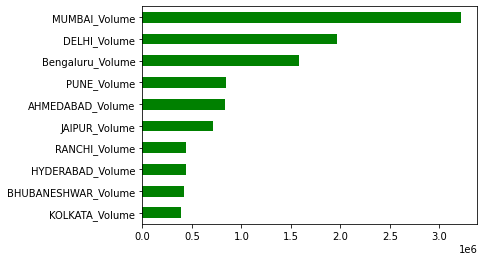

In [19]:
Volume.sort_values(inplace=True)
Volume.plot(kind='barh',y='Mandi Potato Volume from 2015-2020',x='Mandi',color='g')

# Line Plot for wholesale price

In [20]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

MUMBAIWholesale = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_WholesalePrice,
name="MUMBAI")

HYDERABADWholesale = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_WholesalePrice,
name="Hyderabad")

DELHIWholesale = go.Scatter(
x=df2.Date,
y=df2.DELHI_WholesalePrice,
name="Mumbai")

AhmWholesale = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_WholesalePrice,
name="Ahemdabad")

JaipurWholesale = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_WholesalePrice,
name="Jaipur")

BengaluruWholesale = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_WholesalePrice,
name="Bengaluru")

PuneWholesale = go.Scatter(
x=df2.Date,
y=df2.PUNE_WholesalePrice,
name="Pune")

BHUBANESHWARWholesale = go.Scatter(
x=df2.Date,
y=df2.BHUBANESHWAR_WholesalePrice,
name="BHUBANESHWAR")

RANCHIWholesale = go.Scatter(
x=df2.Date,
y=df2.RANCHI_WholesalePrice,
name="RANCHI")

KolWholesale = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_WholesalePrice,
name="Kolkata")

data = [MUMBAIWholesale, HYDERABADWholesale, DELHIWholesale,AhmWholesale,JaipurWholesale,BengaluruWholesale,PuneWholesale,BHUBANESHWARWholesale,RANCHIWholesale,KolWholesale]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)


'temp-plot.html'

# Line plot for Retail price

In [21]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

DelhiRetail = go.Scatter(
x=df2.Date,
y=df2.DELHI_RetailPrice,
name="Delhi")

HyderabadRetail = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_RetailPrice,
name="Hyderabad")

MumbaiRetail = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_RetailPrice,
name="Mumbai")

AhmRetail = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_RetailPrice,
name="Ahemdabad")

JaipurRetail = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_RetailPrice,
name="Jaipur")

BengaluruRetail = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_RetailPrice,
name="Bengaluru")

PuneRetail = go.Scatter(
x=df2.Date,
y=df2.PUNE_RetailPrice,
name="Pune")

BHUBANESHWARRetail = go.Scatter(
x=df2.Date,
y=df2.BHUBANESHWAR_RetailPrice,
name="BHUBANESHWAR")

RANCHIRetail = go.Scatter(
x=df2.Date,
y=df2.RANCHI_RetailPrice,
name="RANCHI")

KolRetail = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_RetailPrice,
name="Kolkata")

data = [DelhiRetail, HyderabadRetail, MumbaiRetail,AhmRetail,JaipurRetail,BengaluruRetail,PuneRetail,BHUBANESHWARRetail,RANCHIRetail,KolRetail]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

In [22]:
# Top 10 Potato Mandi In India map
import folium

In [23]:
Potato_mandi = pd.read_csv("/content/drive/My Drive/Capstone_Commodity_SureshaHP/Potato/Potato_centroids.csv")
Potato_mandi.head()

,TopTomatoMandi,Latitude,Longitude
0,Delhi,28.610001,77.230003
1,Hyderabad,17.387140,78.491684
2,Mumbai,19.076090,72.877426
3,Ahemdabad,23.013054,72.562515
4,Jaipur,26.958302,75.743347


In [24]:
pip install gmplot

     |████████████████████████████████| 174kB 3.3MB/s 


In [25]:
# import gmplot package 
import gmplot 
  
latitude_list = Potato_mandi['Latitude'] 
longitude_list = Potato_mandi ['Longitude'] 
  
gmap3 = gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '# FF0000', 
                              size = 40, marker = False ) 
  
# Plot method Draw a line in 
# between given coordinates 
gmap3.plot(latitude_list, longitude_list,  
           'cornflowerblue', edge_width = 2.5) 
  
gmap3.draw( "map14.html" )